In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset

In [3]:
data = pd.read_csv(r"C:\Users\susha\Downloads\Wine_clust .csv")

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.shape

(178, 13)

In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
# Exploratory data analysis

In [9]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [10]:
#Visualisation

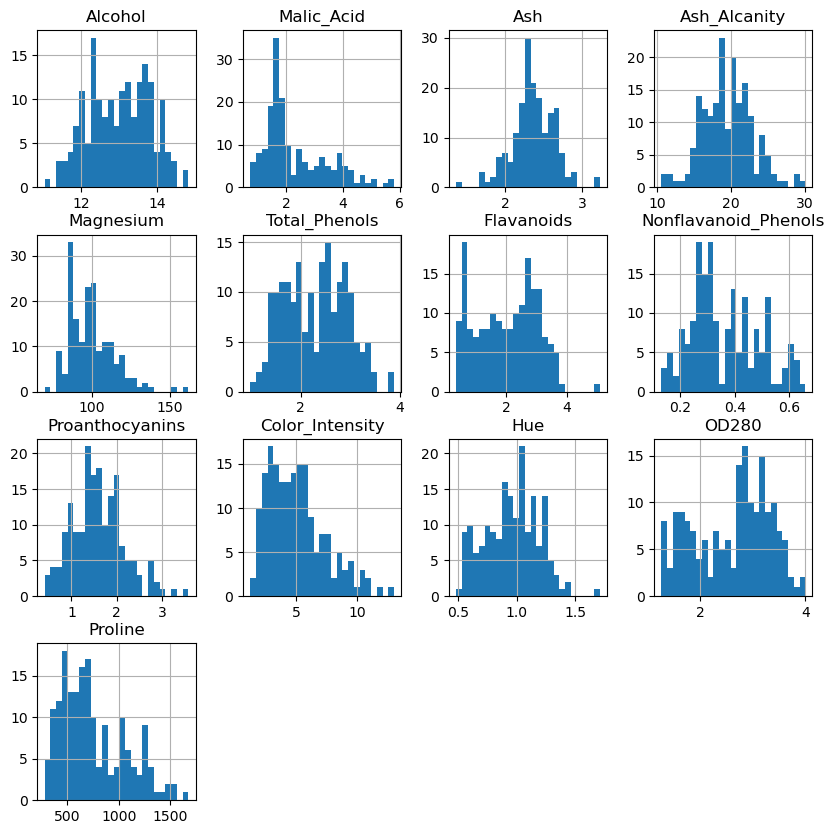

In [11]:
data.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

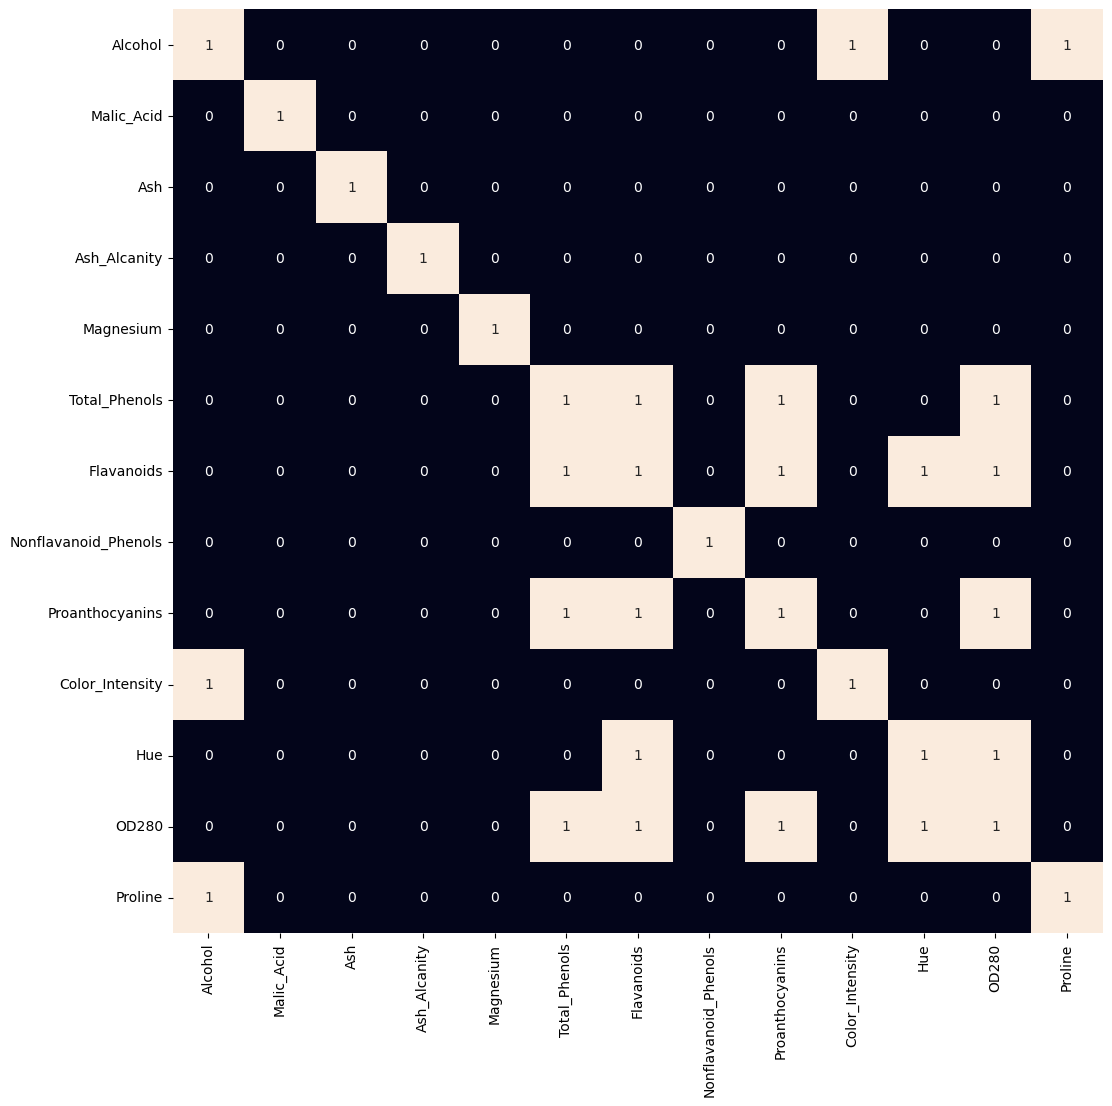

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr()>0.5,annot=True,cbar=False)
plt.show()


In [13]:
#preprocessing -Outlier detection

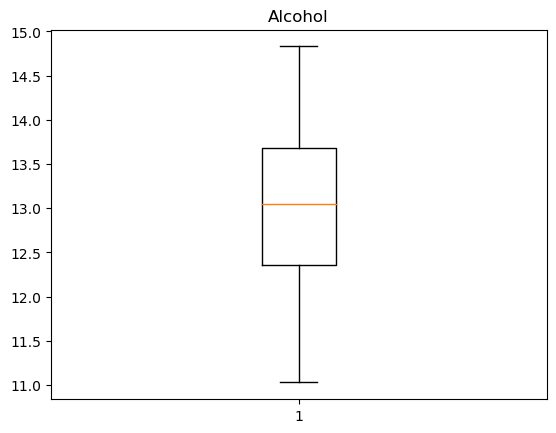

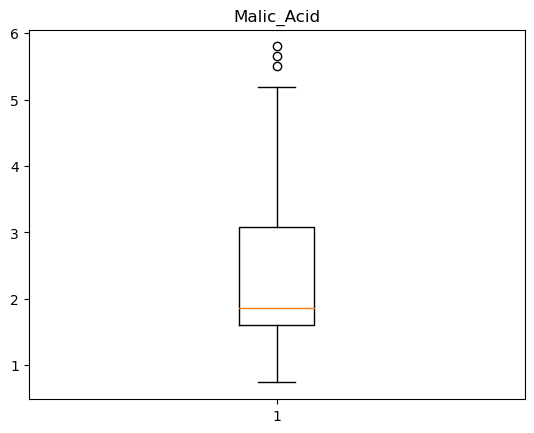

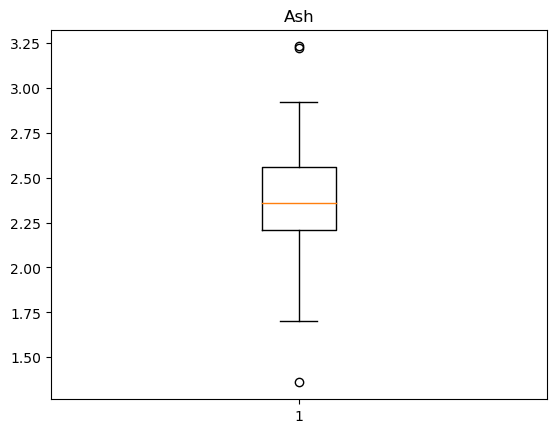

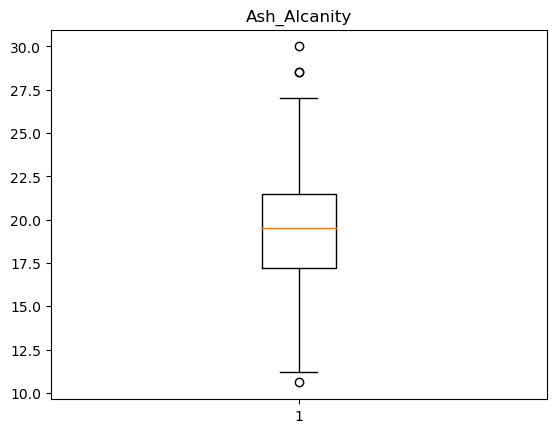

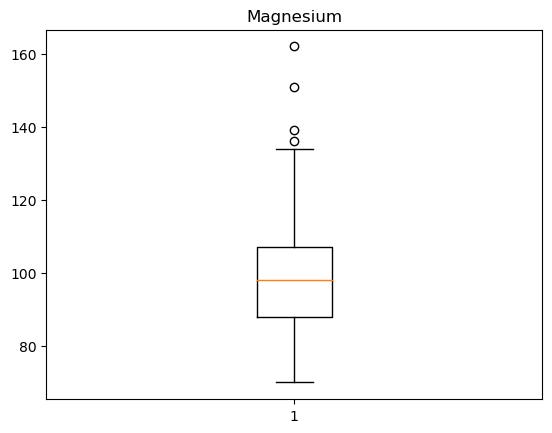

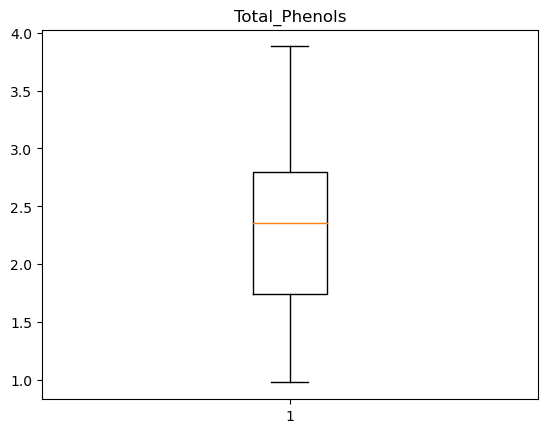

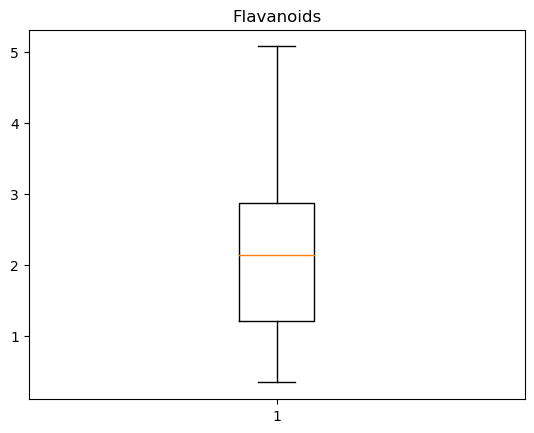

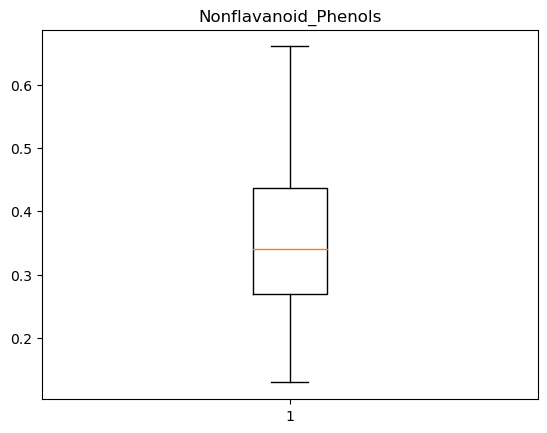

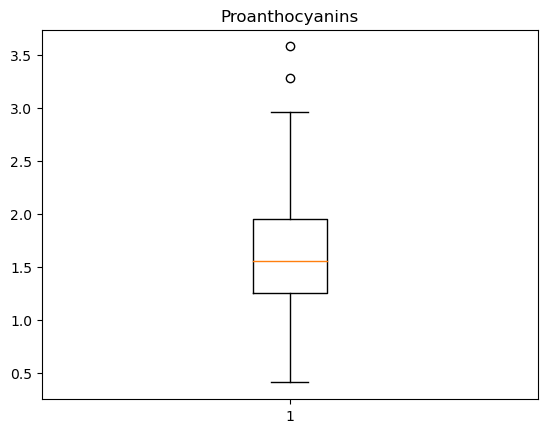

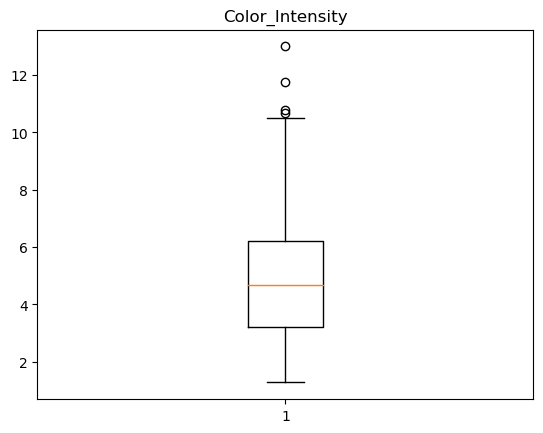

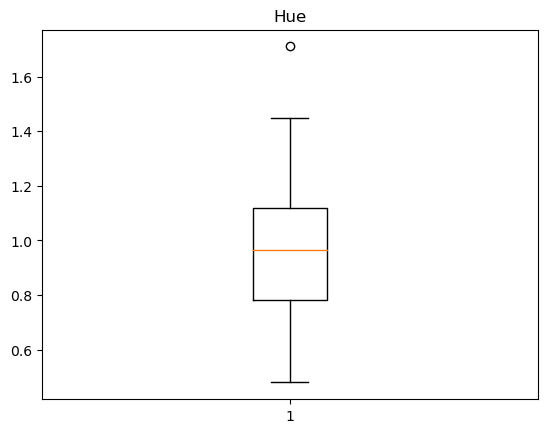

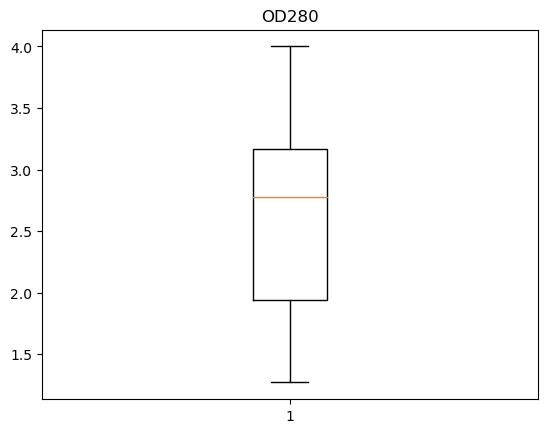

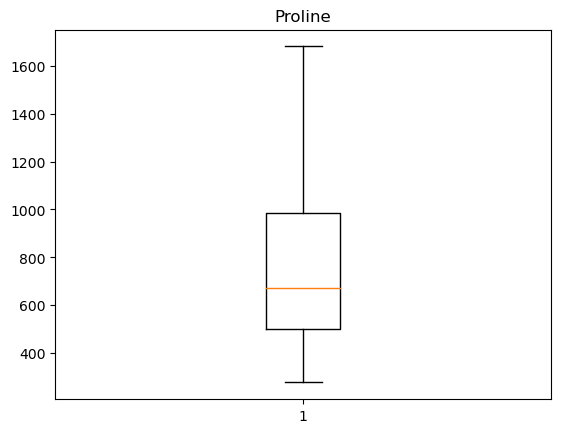

In [14]:
num_cols= ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [15]:
Q1 = data['Hue'].quantile(0.25)
Q3 = data['Hue'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['Hue']=np.where(data['Hue']>upper_whisker,upper_whisker,np.where(data['Hue']<lower_whisker,lower_whisker,data['Hue']))

In [16]:
Q1 = data['Color_Intensity'].quantile(0.25)
Q3 = data['Color_Intensity'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['Color_Intensity']=np.where(data['Color_Intensity']>upper_whisker,upper_whisker,np.where(data['Color_Intensity']<lower_whisker,lower_whisker,data['Color_Intensity']))

In [17]:
Q1 = data['Proanthocyanins'].quantile(0.25)
Q3 = data['Proanthocyanins'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['Proanthocyanins']=np.where(data['Proanthocyanins']>upper_whisker,upper_whisker,np.where(data['Proanthocyanins']<lower_whisker,lower_whisker,data['Proanthocyanins']))

In [18]:
Q1 = data['Magnesium'].quantile(0.25)
Q3 = data['Magnesium'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['Magnesium']=np.where(data['Magnesium']>upper_whisker,upper_whisker,np.where(data['Magnesium']<lower_whisker,lower_whisker,data['Magnesium']))

In [19]:
Q1 = data['Ash_Alcanity'].quantile(0.25)
Q3 = data['Ash_Alcanity'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['Ash_Alcanity']=np.where(data['Ash_Alcanity']>upper_whisker,upper_whisker,np.where(data['Ash_Alcanity']<lower_whisker,lower_whisker,data['Ash_Alcanity']))

In [20]:
Q1 = data['Ash'].quantile(0.25)
Q3 = data['Ash'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['Ash']=np.where(data['Ash']>upper_whisker,upper_whisker,np.where(data['Ash']<lower_whisker,lower_whisker,data['Ash']))

In [21]:
Q1 = data['Malic_Acid'].quantile(0.25)
Q3 = data['Malic_Acid'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['Malic_Acid']=np.where(data['Malic_Acid']>upper_whisker,upper_whisker,np.where(data['Malic_Acid']<lower_whisker,lower_whisker,data['Malic_Acid']))

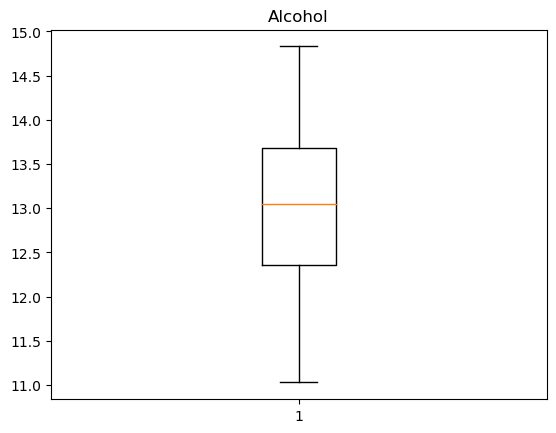

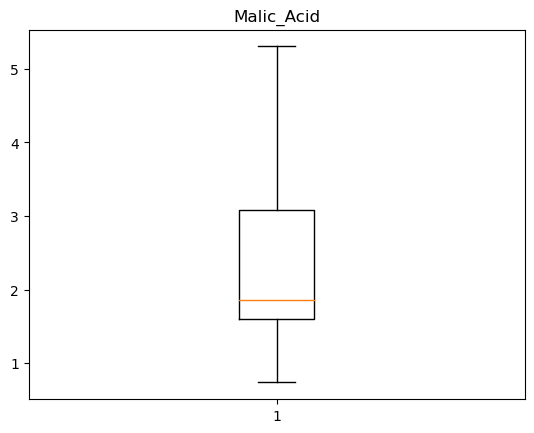

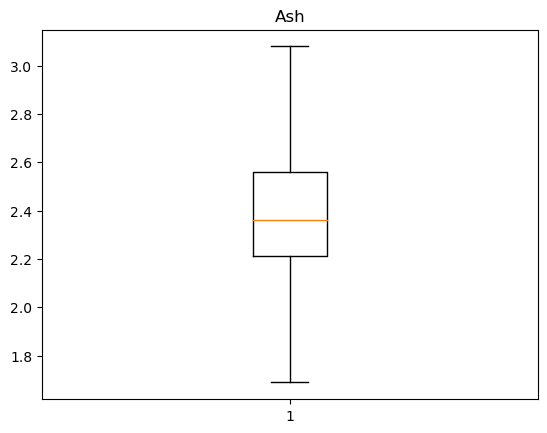

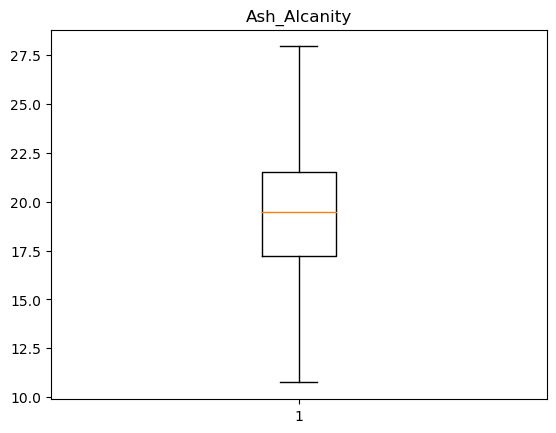

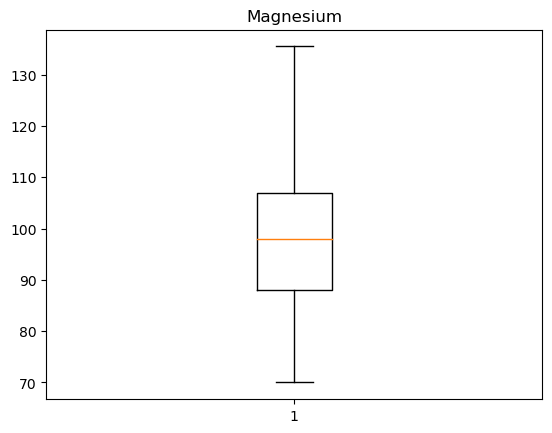

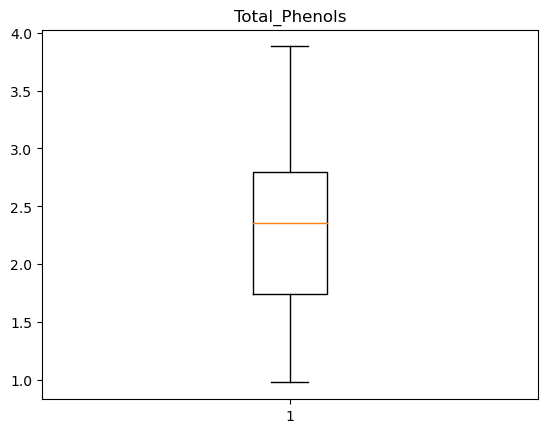

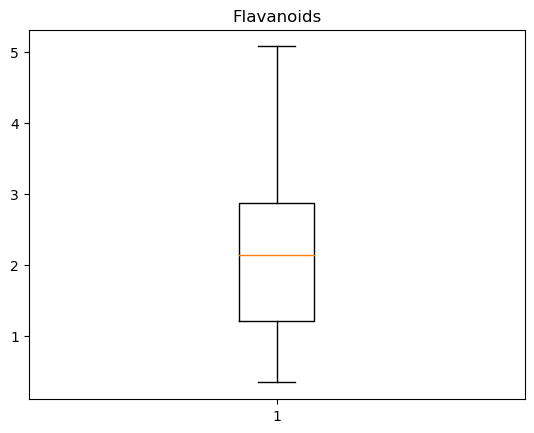

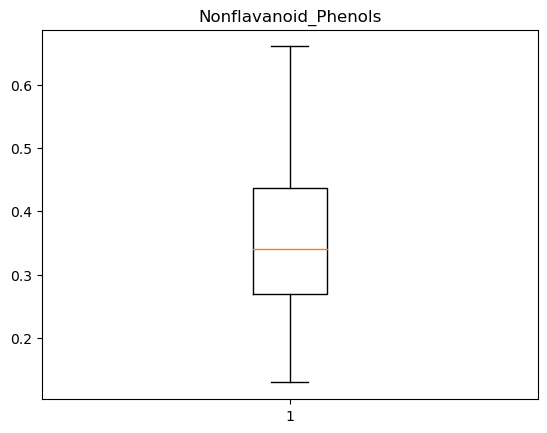

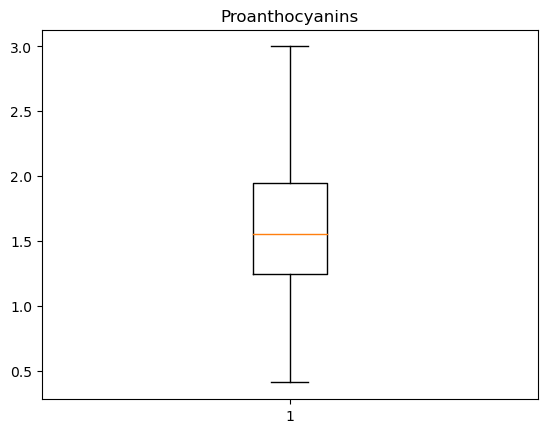

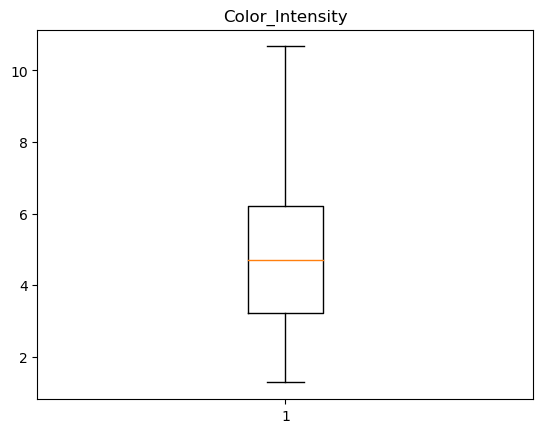

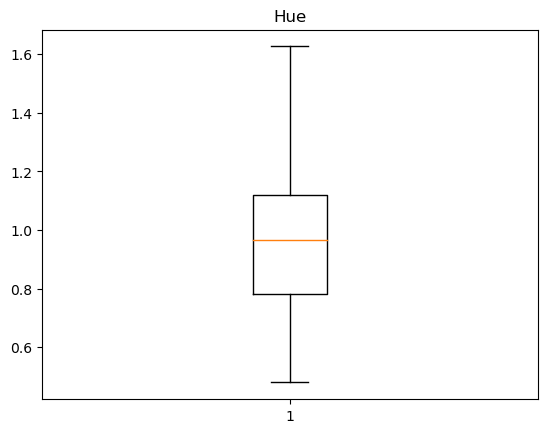

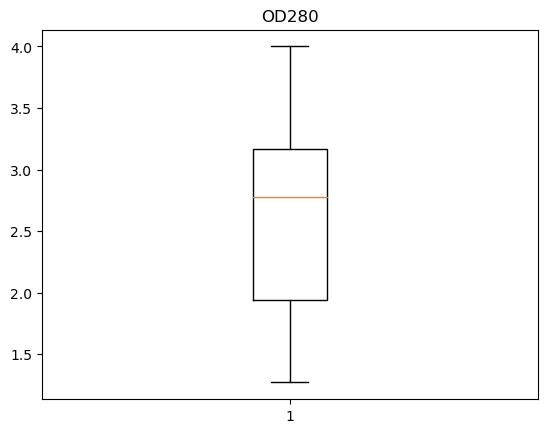

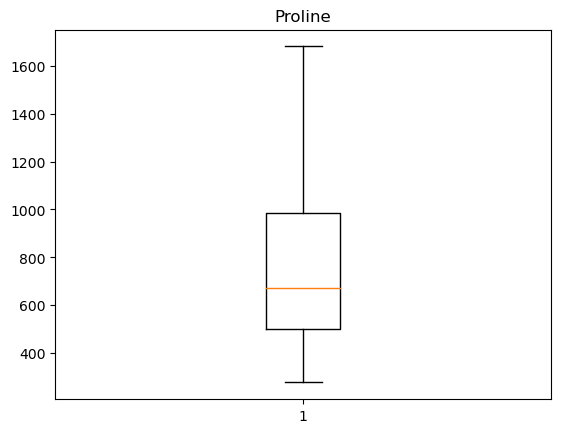

In [22]:
num_cols= ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

#Scaling the data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
 
features =scaler.fit(data)
features =features.transform(data)
 
# Convert to pandas Dataframe
scaled_data =pd.DataFrame(features,columns=data.columns)
# Print the scaled data
scaled_data.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242


In [24]:
scaled_data.shape

(178, 13)

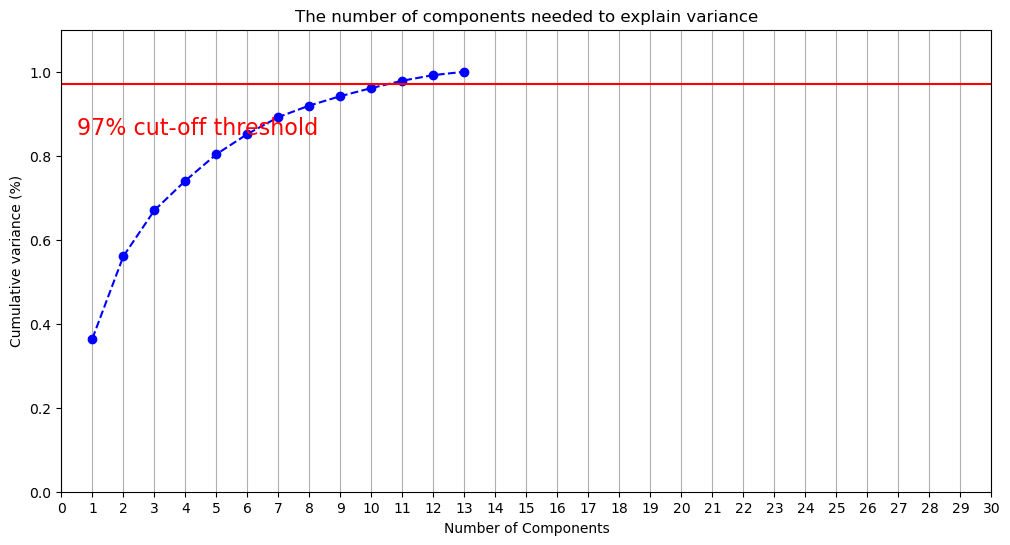

In [25]:
from sklearn.decomposition import PCA
pca = PCA().fit(scaled_data)

plt.rcParams["figure.figsize"] = (12,6)
# .rcParams is a dictionary-like object in matplotlib that stores the runtime configuration settings for the library
#  It provides a way to customize the behavior and appearance of matplotlib plots

fig, ax = plt.subplots()
#creates new figure and axes object
# fig: variable representing the figure
# ax: variable representing the axes on which the data is plotted

xi = np.arange(1, 14, step=1)
# creates an array xi that contains numbers from 1 to 30 (inclusive) with a step of 1
#  used as the x-values for plotting purposes

y = np.cumsum(pca.explained_variance_ratio_)
# calculates the cumulative sum of the explained variance ratio from a PCA (Principal Component Analysis) object, 
# assuming pca is a valid PCA model
# resulting values are stored in the array 'y' and are typically used as the y-values for plotting


# setting the y axis limits
plt.ylim(0.0,1.1)
# The first argument 0.0 represents the lower limit, and the second argument 1.1 represents the upper limit
# y axis ranges from 0 to 1.1

plt.plot(xi, y, marker='o', linestyle='--', color='b')
# setting plot characteristics of the graph

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 31, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='-')
# adds a horizontal line to the plot at the y-coordinate value of 0.97

plt.text(0.5, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)
# adds a text annotation to the plot at the specified coordinates
# 0.5, represents the x-coordinate of the text position, and 0.85, represents the y-coordinate

ax.grid(axis='x')
plt.show()

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.97)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape 

(178, 11)

In [27]:
pca.components_.shape

(11, 13)

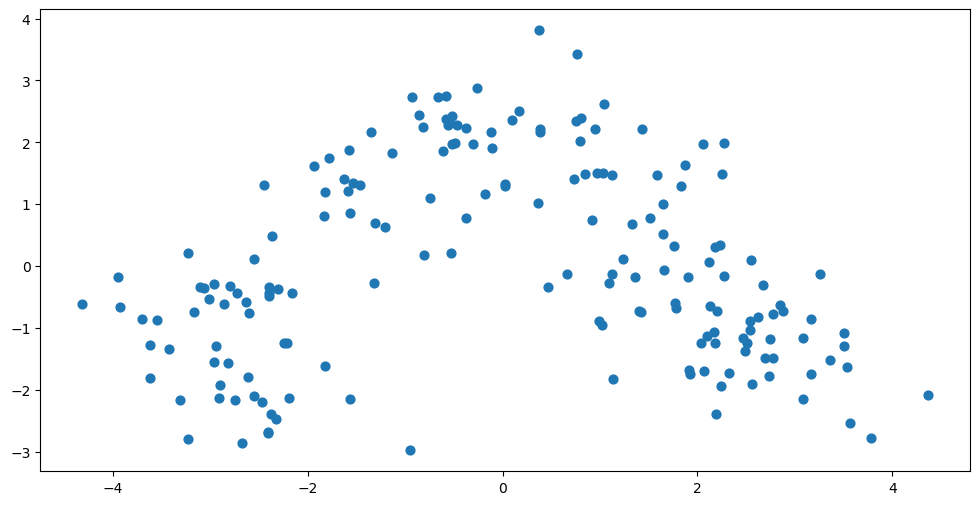

In [28]:
# Scatter plot
plt.scatter(x_pca[:,0], x_pca[:,1], s=40)

In [29]:
 # K Means CLustering

In [30]:
X= x_pca

C:\Users\susha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\susha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\susha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\susha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

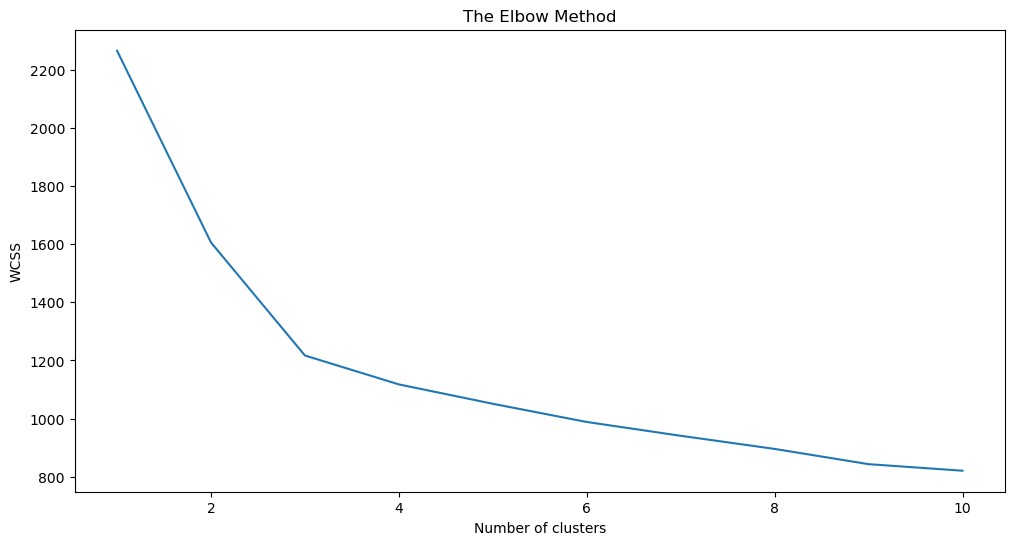

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


From the above graph, it is clear that there is turning like an elbow at k=3. So, we can say that the right number of cluster for the given datasets is 3.

In [32]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\susha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\susha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
labels = kmeans.labels_
data['Cluster'] = labels

In [34]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


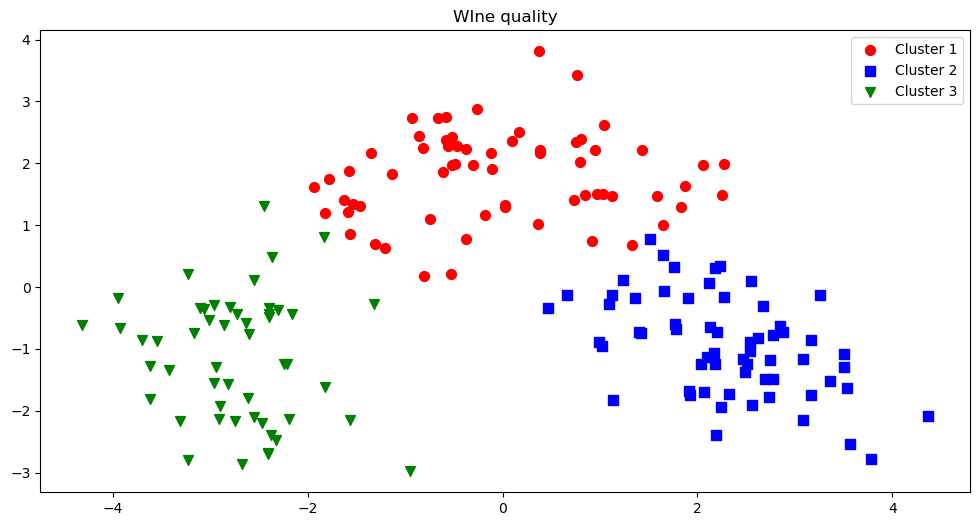

In [35]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1', marker = 'o')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2', marker = 's')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3', marker = 'v')
plt.title('WIne quality')
plt.legend()
plt.show()

In [36]:
#Evaluation metrics
from sklearn.metrics import silhouette_score
#Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.2925104100624339


In [65]:
from sklearn import metrics
print("KMeans clustering Davis-Bouldin Score: ", 
      metrics.davies_bouldin_score(X,y_kmeans))
print("KMeans clustering Calinski-Harabsz Score: ", 
      metrics.calinski_harabasz_score(X,y_kmeans))

KMeans clustering Davis-Bouldin Score:  1.3542895328619842
KMeans clustering Calinski-Harabsz Score:  75.31817533215138


# Hierarchial clustering

In [38]:
df = pd.read_csv(r"C:\Users\susha\Downloads\Wine_clust .csv")

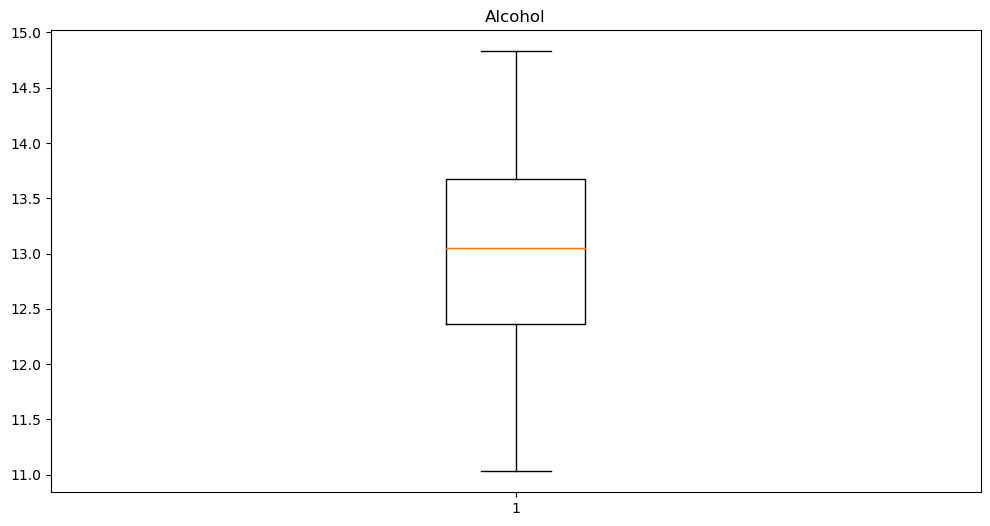

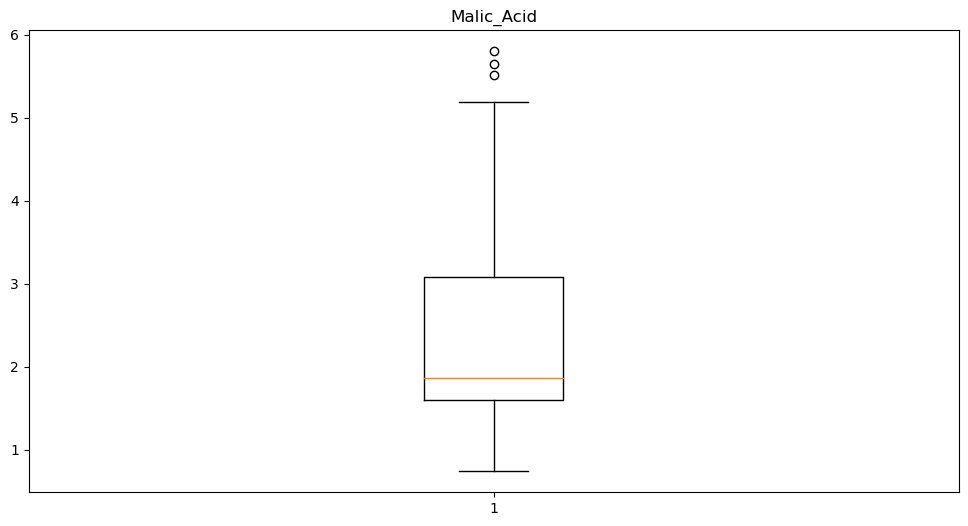

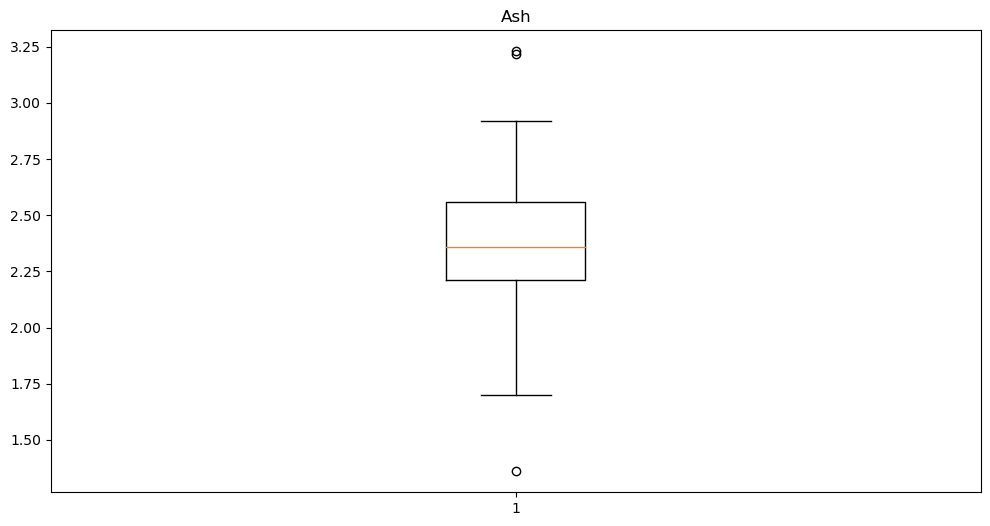

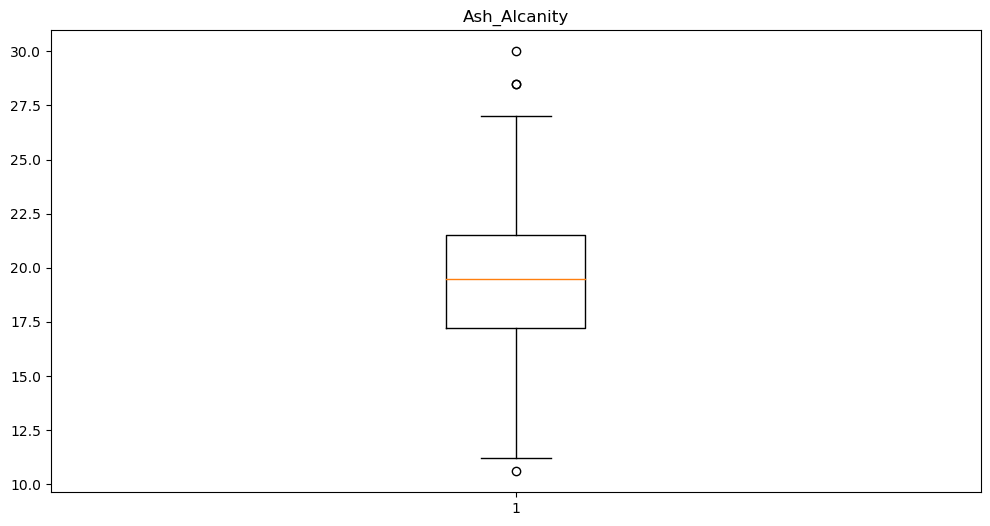

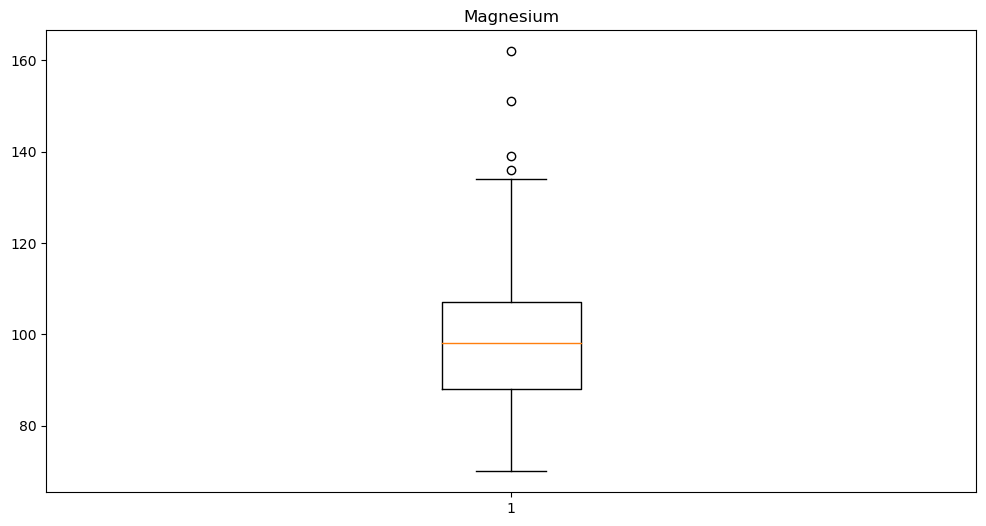

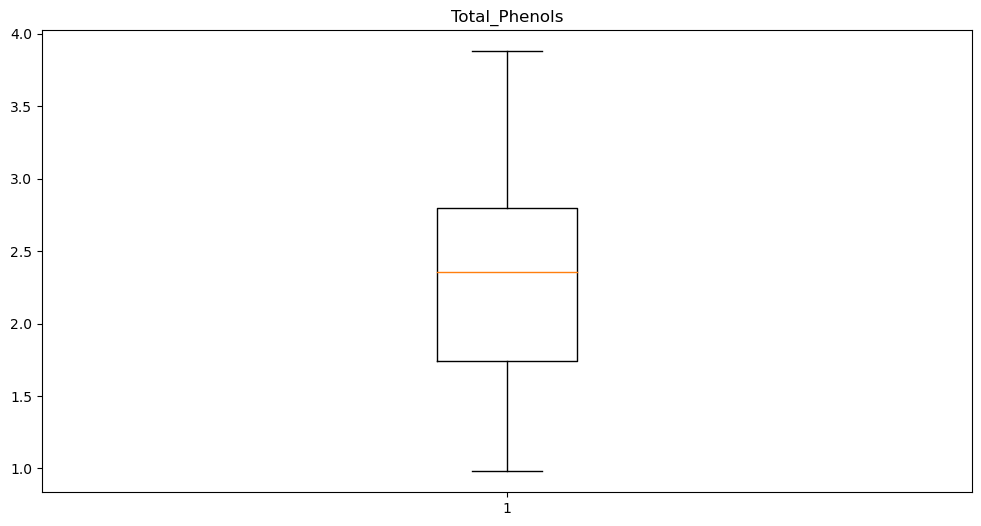

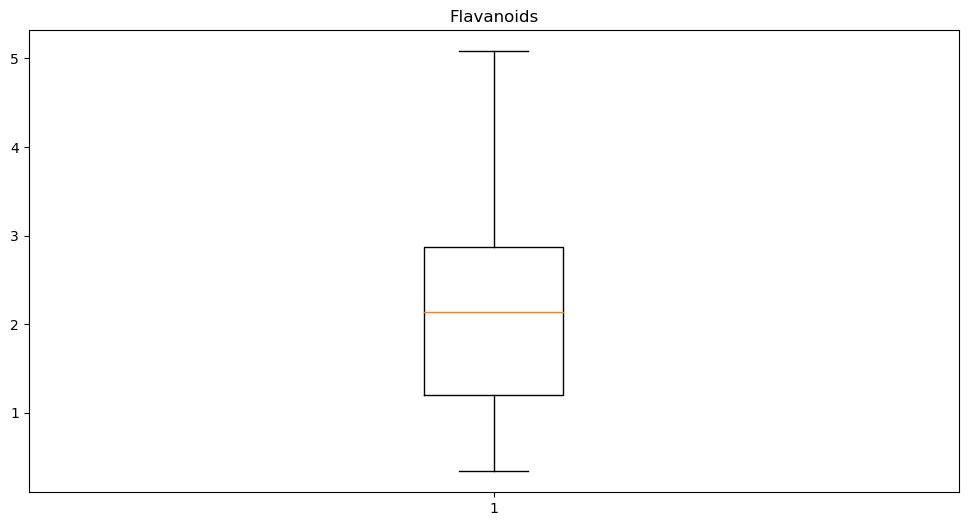

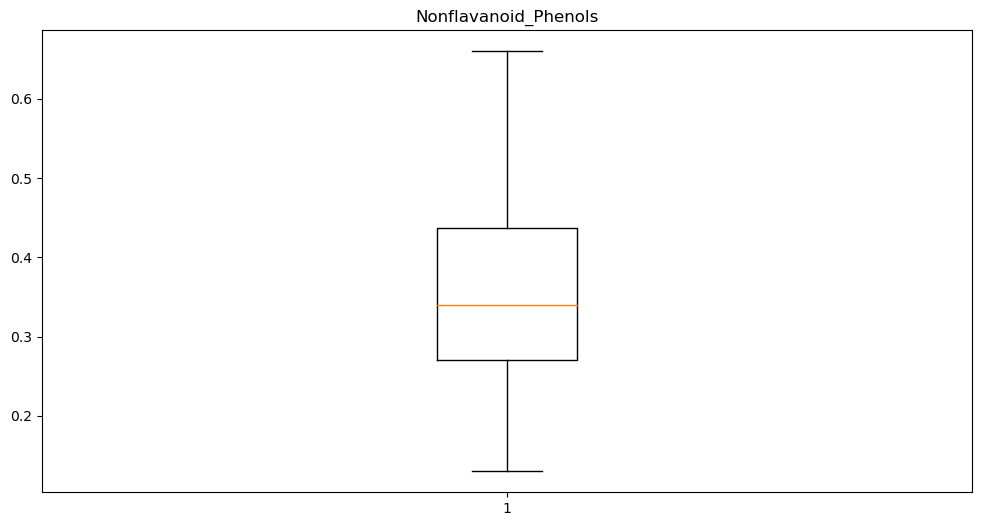

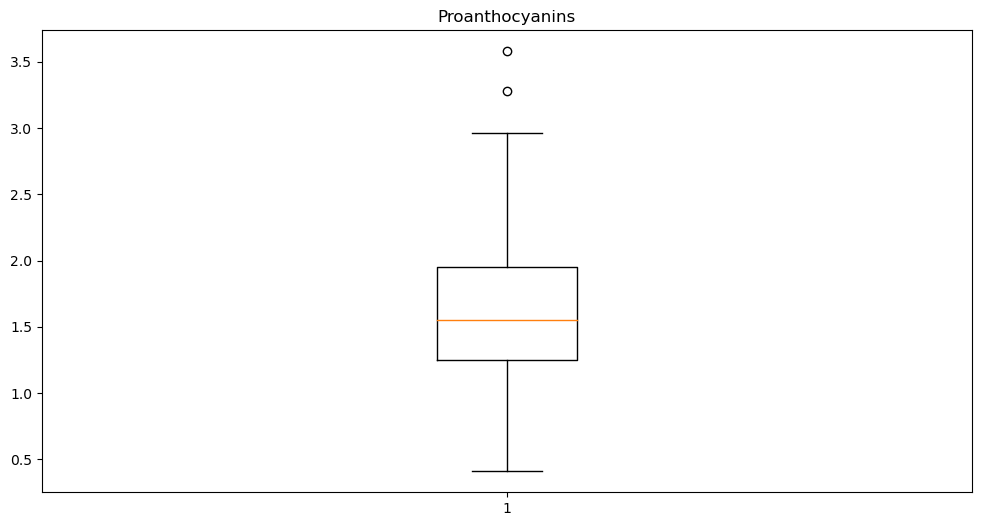

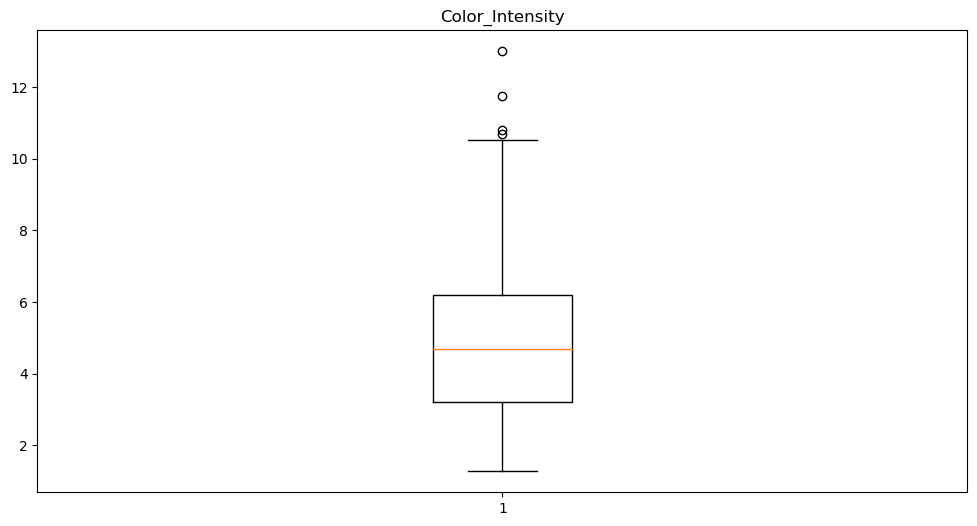

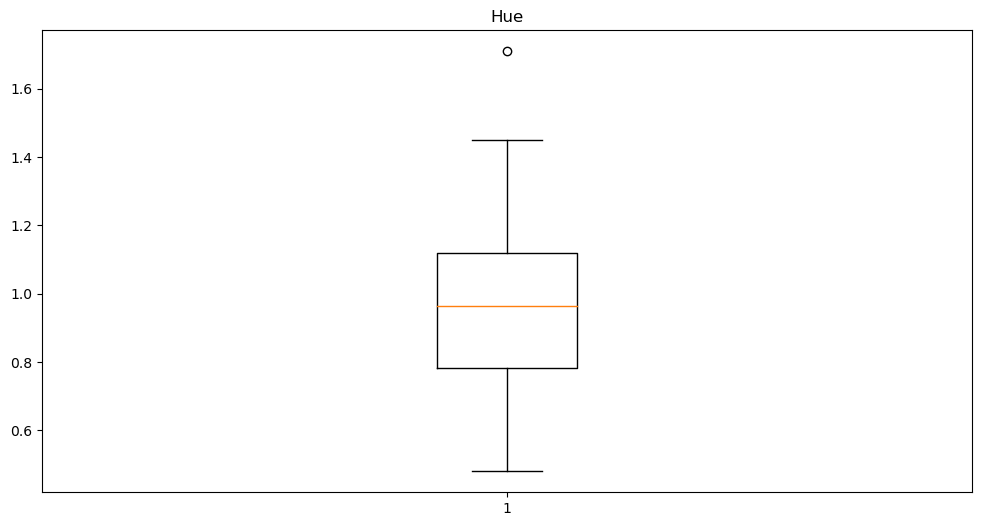

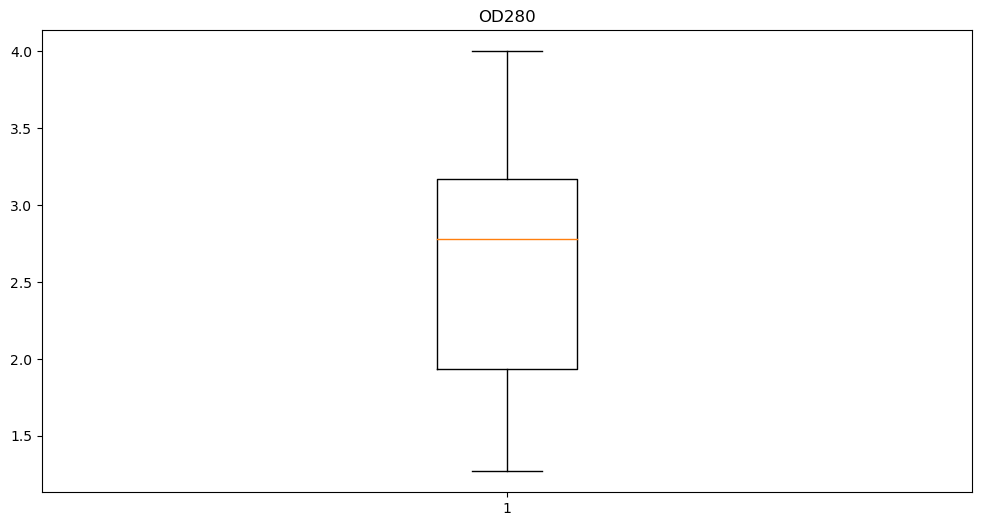

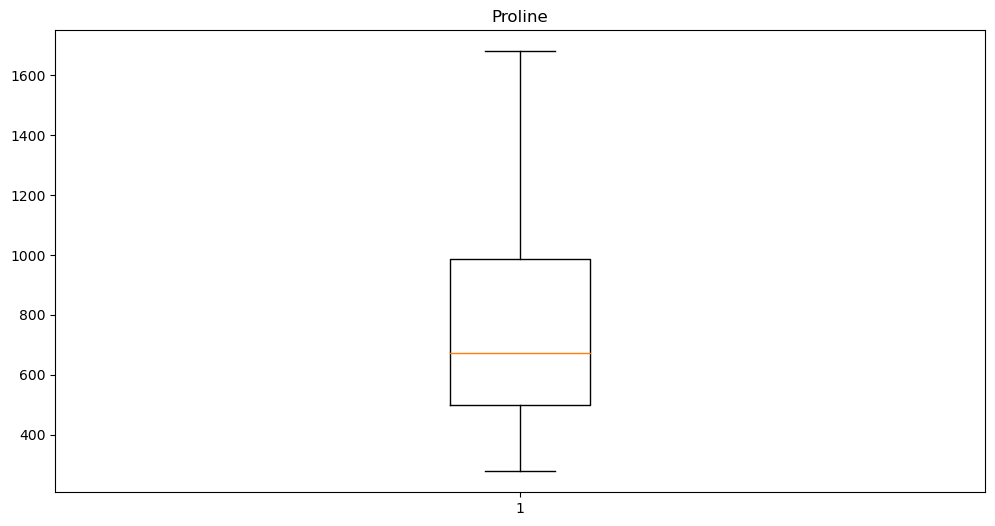

In [39]:
num_cols= ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']
for i in num_cols:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [40]:
Q1 = df['Hue'].quantile(0.25)
Q3 = df['Hue'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Hue']=np.where(df['Hue']>upper_whisker,upper_whisker,np.where(df['Hue']<lower_whisker,lower_whisker,df['Hue']))

In [41]:
Q1 = df['Color_Intensity'].quantile(0.25)
Q3 = df['Color_Intensity'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Color_Intensity']=np.where(df['Color_Intensity']>upper_whisker,upper_whisker,np.where(df['Color_Intensity']<lower_whisker,lower_whisker,df['Color_Intensity']))

In [42]:
Q1 = df['Proanthocyanins'].quantile(0.25)
Q3 = df['Proanthocyanins'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Proanthocyanins']=np.where(df['Proanthocyanins']>upper_whisker,upper_whisker,np.where(df['Proanthocyanins']<lower_whisker,lower_whisker,df['Proanthocyanins']))

In [43]:
Q1 = df['Magnesium'].quantile(0.25)
Q3 = df['Magnesium'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Magnesium']=np.where(df['Magnesium']>upper_whisker,upper_whisker,np.where(df['Magnesium']<lower_whisker,lower_whisker,df['Magnesium']))

In [44]:
Q1 = df['Ash_Alcanity'].quantile(0.25)
Q3 = df['Ash_Alcanity'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Ash_Alcanity']=np.where(df['Ash_Alcanity']>upper_whisker,upper_whisker,np.where(df['Ash_Alcanity']<lower_whisker,lower_whisker,df['Ash_Alcanity']))

In [45]:
Q1 = df['Ash'].quantile(0.25)
Q3 = df['Ash'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Ash']=np.where(df['Ash']>upper_whisker,upper_whisker,np.where(df['Ash']<lower_whisker,lower_whisker,df['Ash']))

In [46]:
Q1 = df['Malic_Acid'].quantile(0.25)
Q3 = df['Malic_Acid'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Malic_Acid']=np.where(df['Malic_Acid']>upper_whisker,upper_whisker,np.where(df['Malic_Acid']<lower_whisker,lower_whisker,df['Malic_Acid']))

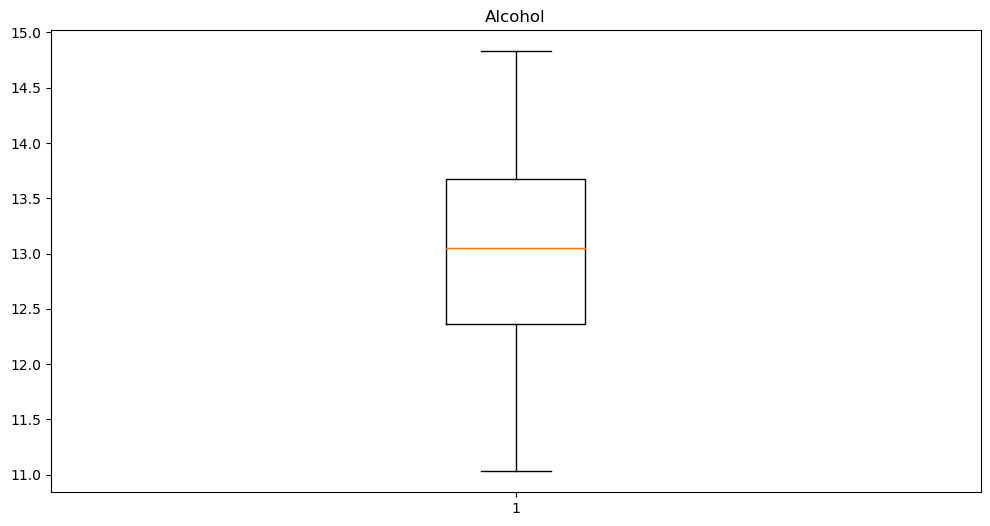

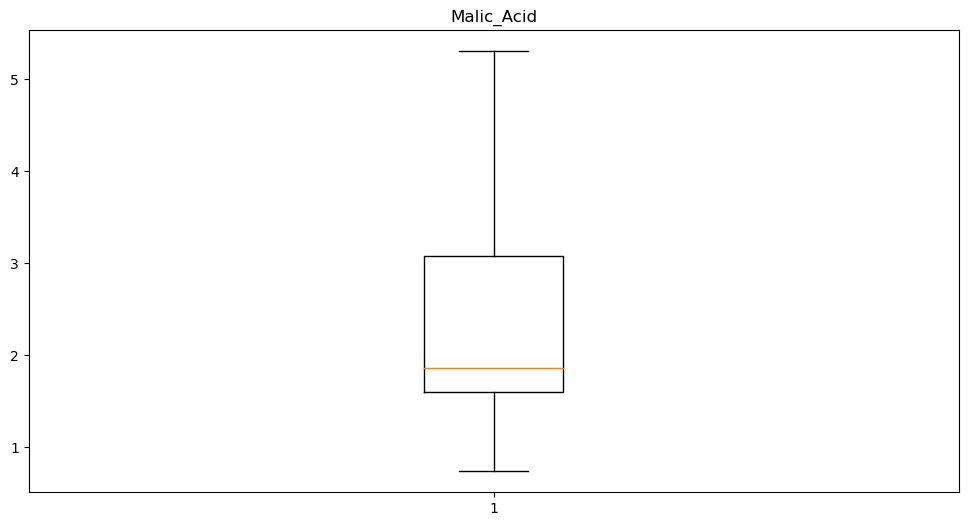

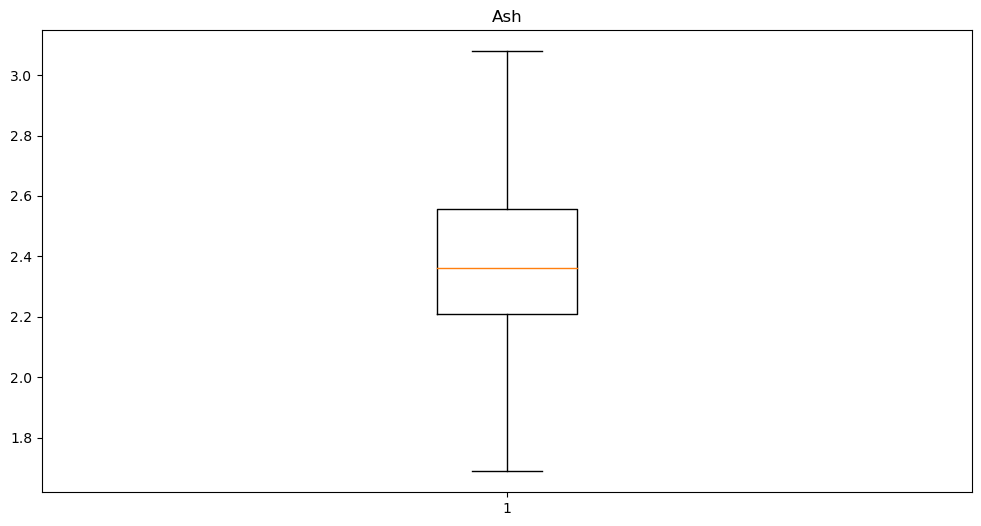

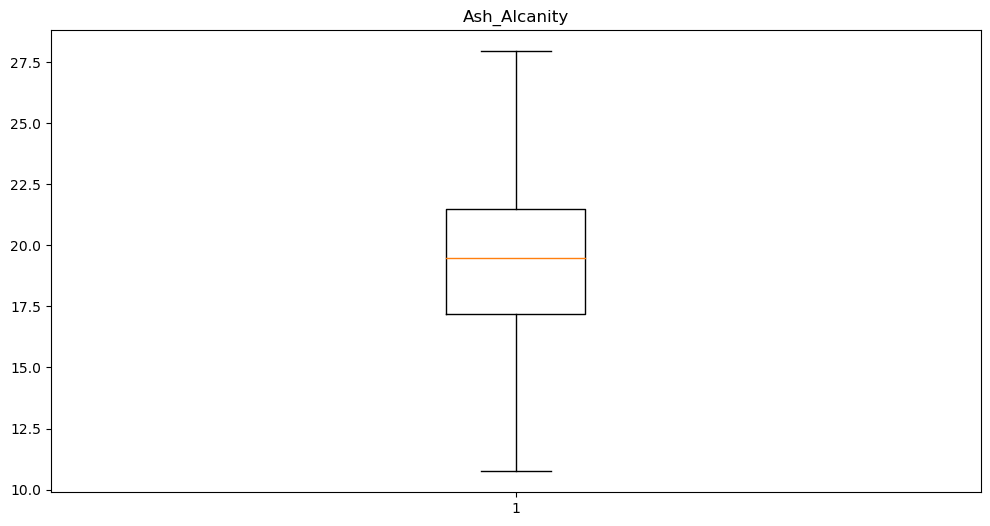

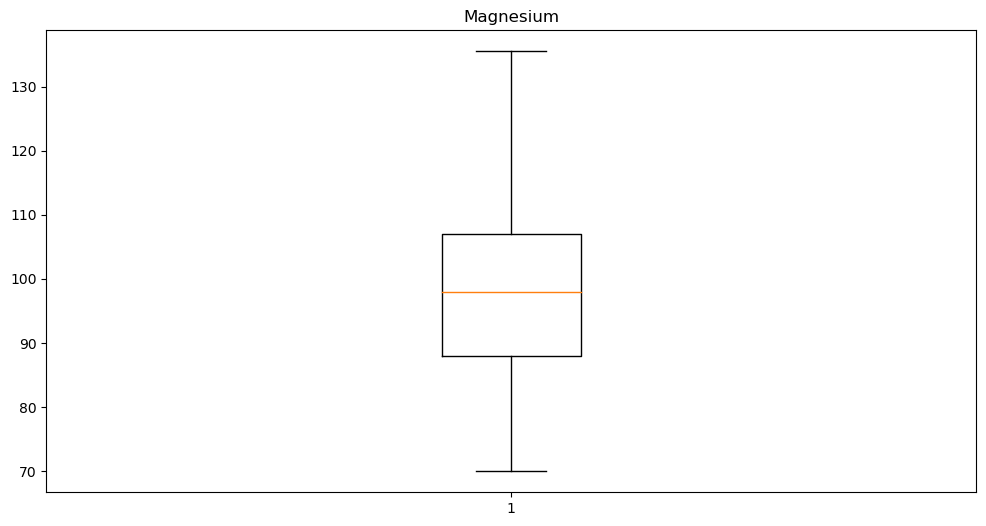

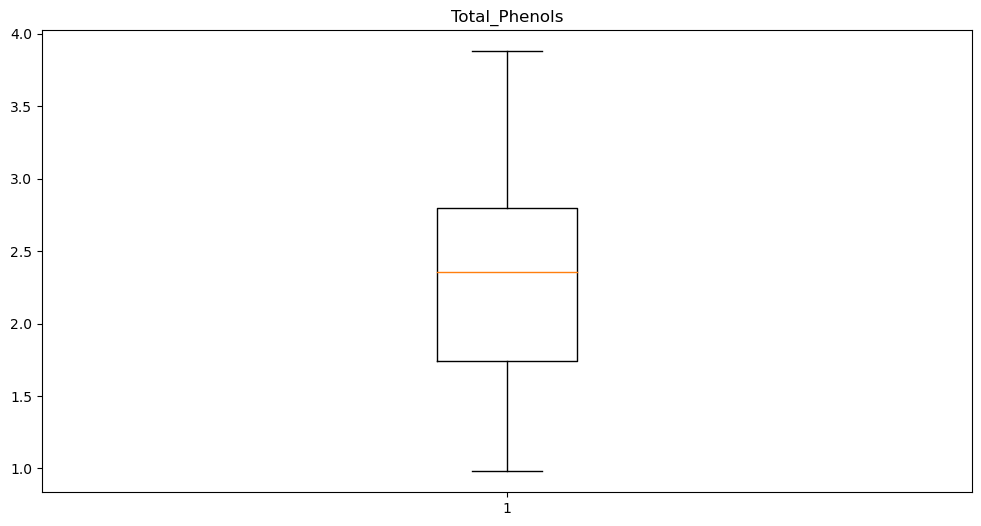

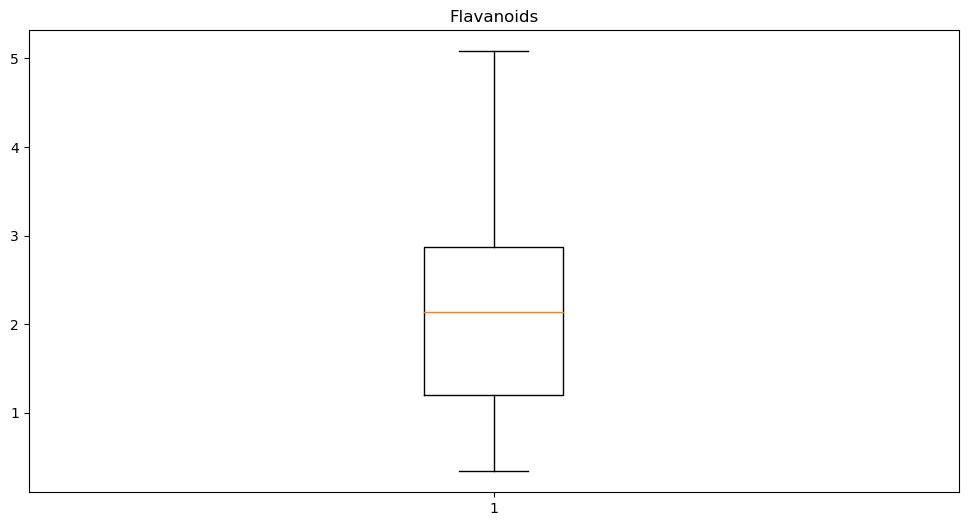

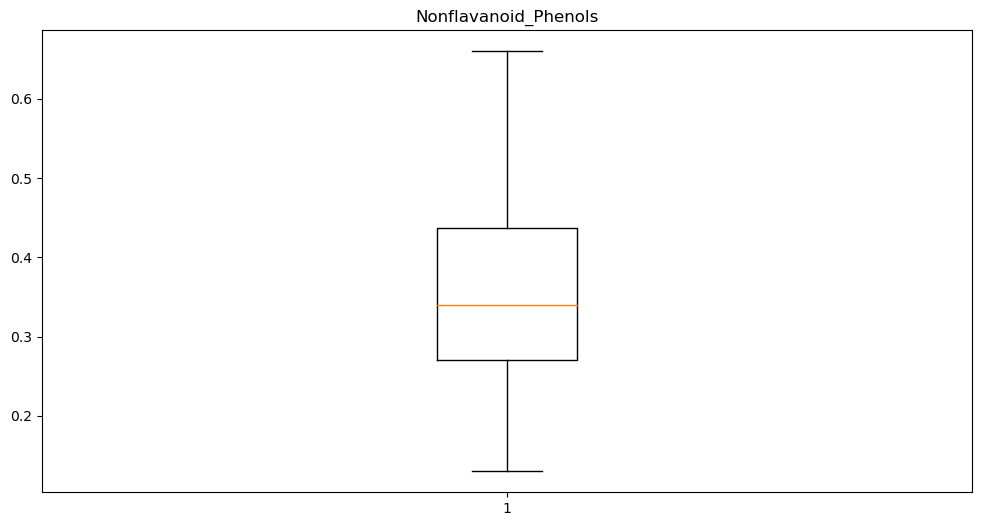

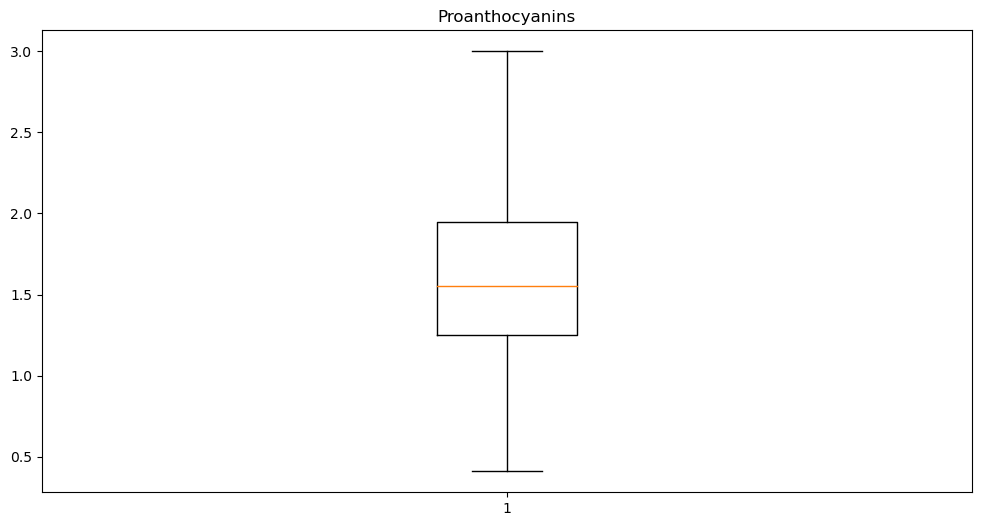

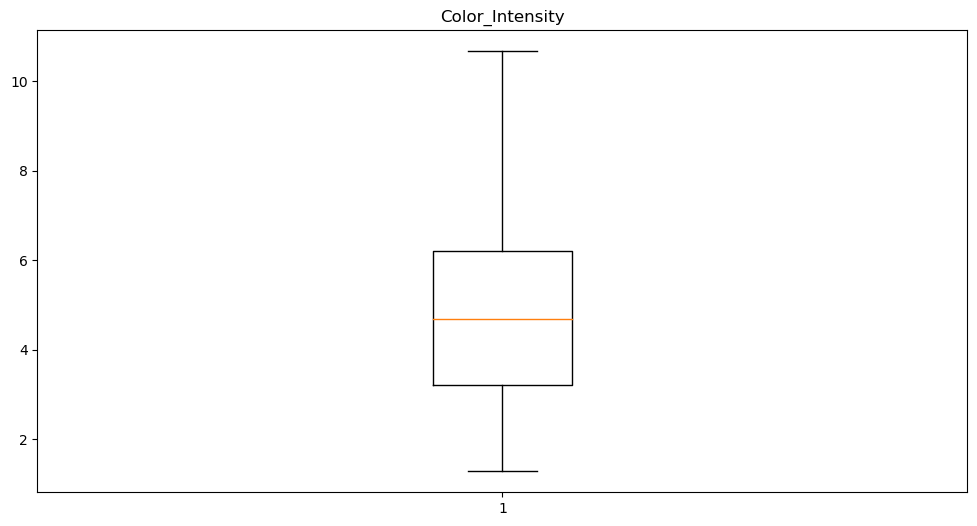

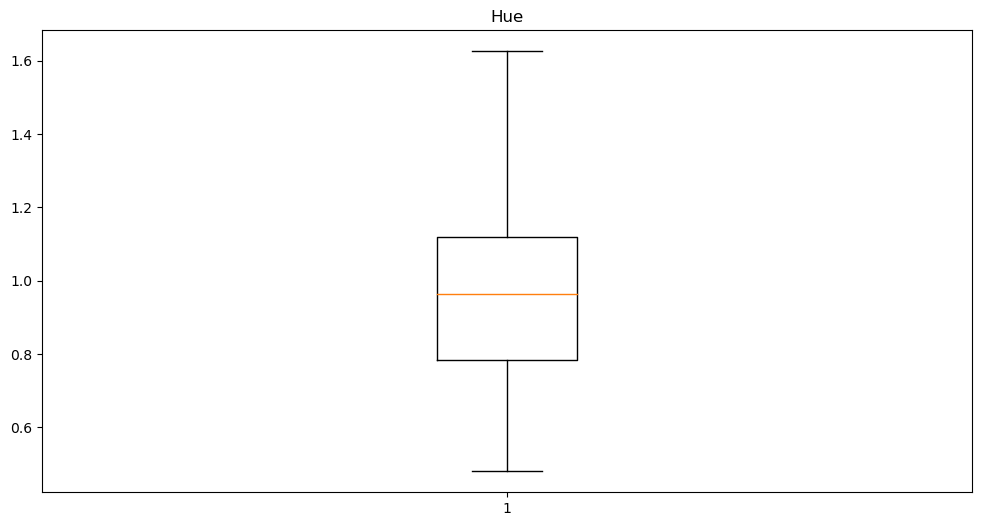

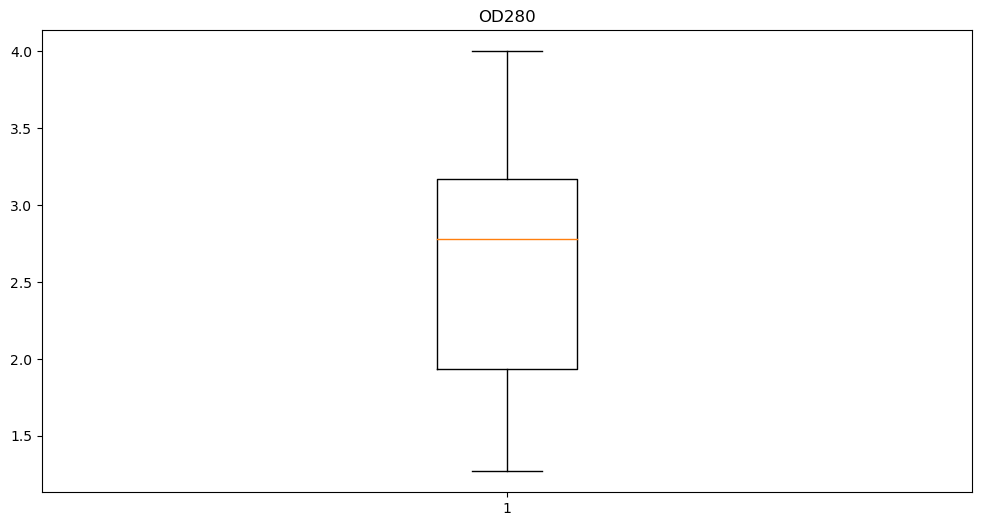

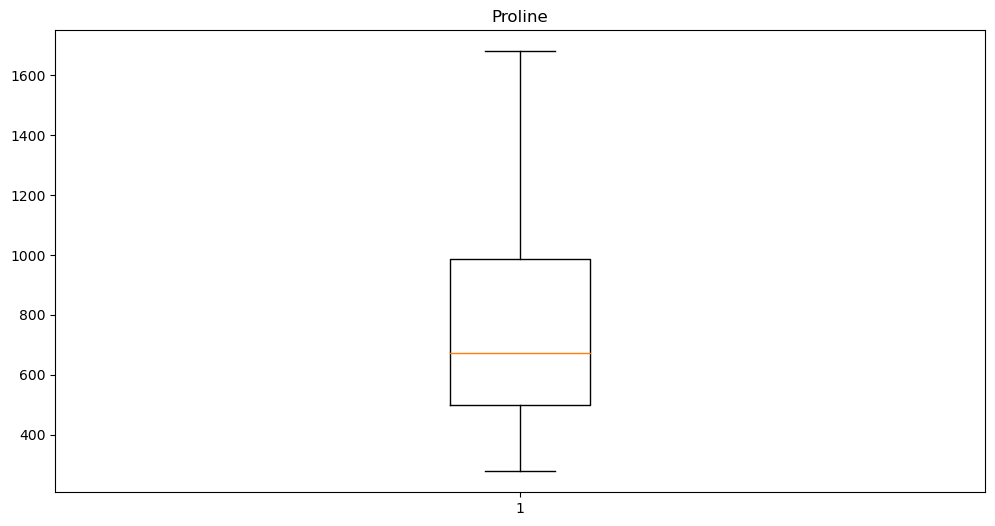

In [47]:
num_cols= ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']
for i in num_cols:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
 
features =scaler.fit(df)
features =features.transform(df)
 
# Convert to pandas Dataframe
scaled_df =pd.DataFrame(features,columns=df.columns)
# Print the scaled data
scaled_df.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242


In [49]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.97)
pca.fit(scaled_df)
wine_df = pca.transform(scaled_df)
wine_df.shape 

(178, 11)

In [50]:
X = wine_df

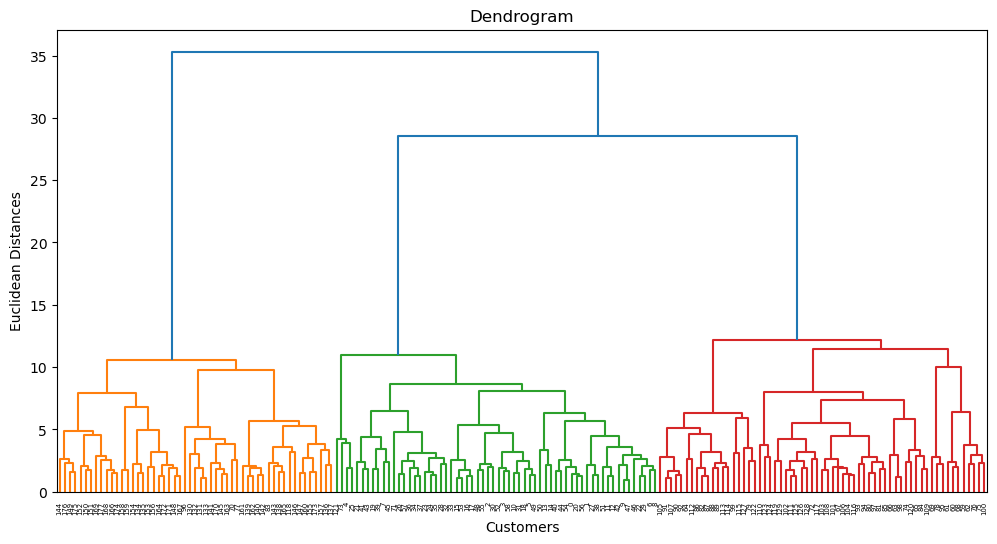

In [51]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# the linkage method determines how the distance between clusters is calculated
# The method='ward' parameter in the sch.linkage function refers to the Ward's method of linkage
# Ward's method is based on the analysis of variance (ANOVA)
# other methods are Single linkage ('single'), Complete linkage ('complete'), Average linkage ('average'), 
#Centroid linkage ('centroid')

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [52]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',linkage = 'ward')
y_hc = hc.fit_predict(wine_df)
# n_clusters: number of clusters required
# affinity: This parameter determines the distance metric used for the linkage.
# affinity='euclidean' means Euclidean distance metric is used to measure the dissimilarity between points
# other affinity parametres are 'l1' or 'manhattan', 'l2' or 'euclidean', 'cosine', 'precomputed'
# y_hc array contains the predicted cluster labels for each data point in X

C:\Users\susha\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [53]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

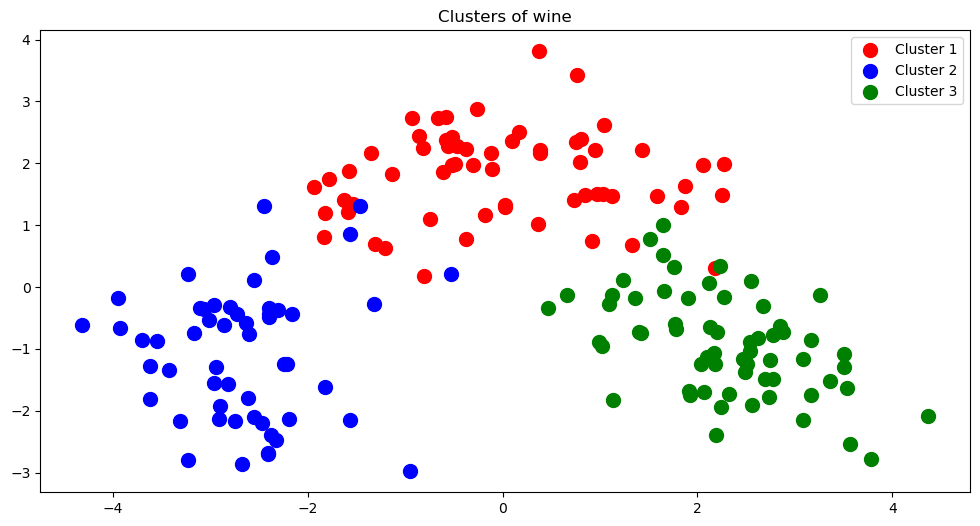

In [54]:
# Plotting data points from Cluster 1
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

# X[y_hc == 0, 0] represents the x-coordinates of the data points in cluster 0
# X[y_hc == 0, 1] represents the y-coordinates of the data points in cluster 0

# Plotting data points from Cluster 2
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

# Plotting data points from Cluster 3
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of wine')
plt.legend()
plt.show()

In [55]:
#Evaluation metrics
from sklearn.metrics import silhouette_score
#Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_hc)
print(silhouette_avg1)

0.28703391181276355


In [57]:
from sklearn import metrics
print("HC Davis-Bouldin Score: ", 
      metrics.davies_bouldin_score(X,y_hc))
print("HC Calinski-Harabsz Score: ", 
      metrics.calinski_harabasz_score(X,y_hc))

HC Davis-Bouldin Score:  1.3688683043267085
HC Calinski-Harabsz Score:  73.20600476600251


# DBScan CLustering

In [58]:
wine=pd.read_csv(r"C:\Users\susha\Downloads\Wine_clust .csv")

In [59]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
 
features =scaler.fit(wine)
features =features.transform(wine)
 
# Convert to pandas Dataframe
wine_scaled=pd.DataFrame(features,columns=wine.columns)
# Print the scaled data
wine_scaled.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


In [60]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3 ,min_samples=2)
dbscan.fit(wine_scaled)
clusters = dbscan.labels_
len(set(clusters))

4

In [61]:
 clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [62]:
# Data points count per label
unique, counts = np.unique(clusters, return_counts=True)
np.asarray((unique, counts)).T

array([[ -1,   5],
       [  0, 168],
       [  1,   3],
       [  2,   2]], dtype=int64)

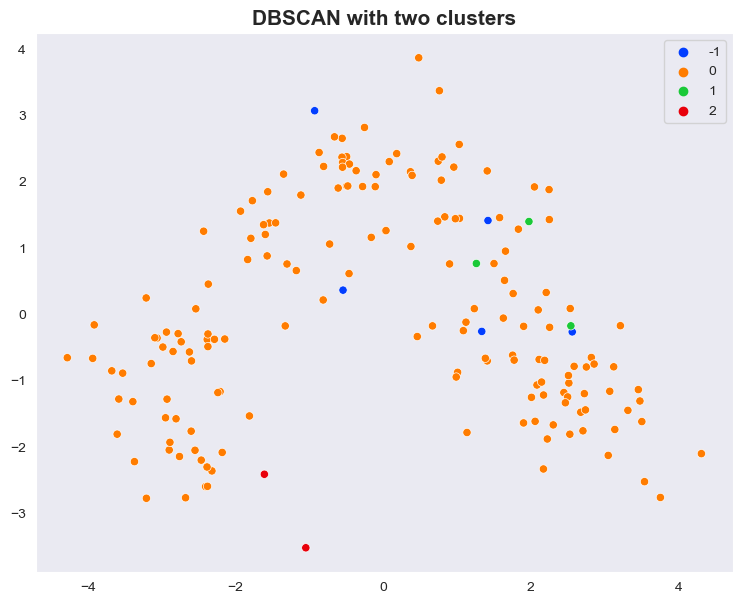

In [63]:
import seaborn as sns
sns.set_style('dark')
pca = PCA(n_components=3)
wine_pca = pca.fit_transform(wine_scaled)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=dbscan.labels_, x=wine_pca[:,0], y=wine_pca[:,1],palette="bright")
plt.title("DBSCAN with two clusters",fontsize=15,fontweight="bold")
plt.show()

In [64]:
print("DBScan clustering silhouette_score: ", 
      metrics.silhouette_score(wine_scaled,clusters))
print("DBScan clustering Davis-Bouldin Score: ", 
      metrics.davies_bouldin_score(wine_scaled,clusters))

print("DBScan clustering Calinski-Harabsz Score: ", 
      metrics.calinski_harabasz_score(wine_scaled,clusters))


DBScan clustering silhouette_score:  0.1342575010132213
DBScan clustering Davis-Bouldin Score:  2.2708388090048905
DBScan clustering Calinski-Harabsz Score:  4.066533341729329


#On analysing the we can infer that the silhouette score and Davis-Bouldin Score shows a small difference for KMeans and Hierarchial clustering.
but Calinski-Harabsz Score shows variation. Less the value of Calinski-Harabsz score more good for solution. In that case Dbmeans clustering shows lowest value among the three
we can infer that KMeans clustering is more suitable among the three